# Notebook for exploring the Chinese-English Dictionary

In [8]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load lexical units table
colnames = ['id', 'simplified', 'traditional', 'pinyin', 
            'english', 'grammar', 'concept_cn', 'concept_en', 
            'domain_cn', 'domain_en', 'subdomain_cn', 'subdomain_en',
            'image', 'mp3', 'notes', 'headword']
types = {'id': np.uint32, 'simplified': np.object, 'traditional': np.object, 
        'pinyin': np.object, 'english': np.object, 'grammar': np.object,
        'concept_cn': np.object, 'concept_en': np.object,
        'domain_cn': np.object, 'domain_en': np.object, 'subdomain_cn': np.object,
         'subdomain_en': np.object, 'image': np.object, 'mp3': np.object,
         'notes': np.object, 'headword': np.uint32}
df = pd.read_table('../data/words.txt', names=colnames, dtype=types)
print df['id'].count() # Number of lexical units

# Unique headwords
print len(df['headword'].unique())

# Example row
df[df.simplified == '佛']

56873
46146


,id,simplified,traditional,pinyin,english,grammar,concept_cn,concept_en,domain_cn,domain_en,subdomain_cn,subdomain_en,image,mp3,notes,headword
3617,3618,佛,\N,fó,Buddha / Awakened One,proper noun,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,"Sanskrit: buddha, Pali: buddha, Japanese: buts...",3618
3618,3619,佛,\N,fó,Buddhist / of Buddhism,adjective,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,As a modifier describing a concept that relate...,3618


In [2]:
# Counts for different parts of speech
df['grammar'].value_counts()

noun              20519
proper noun       12396
verb              11447
adjective          4753
\N                 2684
phrase             1650
adverb              856
set phrase          826
measure word        317
pronoun             223
phonetic            212
conjunction         202
particle            121
number              116
foreign             115
preposition          96
onomatopoeia         82
interjection         64
ordinal              37
bound form           36
pattern              30
auxiliary verb       26
suffix               23
prefix               11
expression           10
radical               6
infix                 2
Name: grammar, dtype: int64

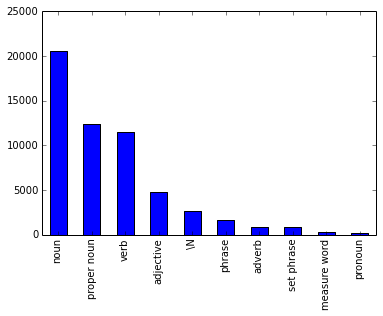

In [3]:
# Histogram for different parts of speech
df['grammar'].value_counts()[:10].plot(kind='bar')

In [4]:
# Counts for lexical units of different domains
df['domain_en'].value_counts()[:10]

Classical Chinese    15415
Buddhism              8159
History               2777
Actions               1521
Condition             1106
Places                1061
Geography              895
Language               822
Emotion                800
Thought                795
Name: domain_en, dtype: int64

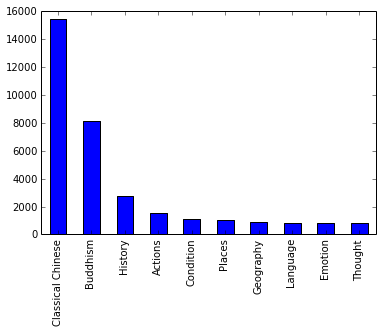

In [5]:
# Histogram for different domains
df['domain_en'].value_counts()[:10].plot(kind='bar')

In [6]:
df['concept_en'].value_counts()[:10]

\N          43456
Sutra        1869
Monastic      781
Surname       378
Temple        370
City          359
Emperor       338
Country       284
Treatise      265
Book          257
Name: concept_en, dtype: int64